# Building Recommender Systems with Spotify Data

## Import Libraries

In [144]:
import ipykernel
ipykernel.__version__
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams.update({'font.size': 22})
%matplotlib inline

## Reading the Data (musics dataset)

In [145]:
spotify_data = pd.read_csv('./data/data.csv.zip')
genre_data = pd.read_csv('./data/data_by_genres.csv')
data_by_year = pd.read_csv('./data/data_by_year.csv')

# Data format
spotify_data['artists'] = spotify_data['artists'].str.replace("['", "", regex=False)
spotify_data['artists'] = spotify_data['artists'].str.replace("']", "", regex=False)
spotify_data['artists'] = spotify_data['artists'].str.replace("'", "", regex=False)

spotify_data.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [146]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [147]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [148]:
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


## Reading the data (playlist data)

In [149]:
playlist_data = pd.read_csv('./data/playlist_data.csv.zip', on_bad_lines='skip')

In [150]:
playlist_data.info()
print(playlist_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12891680 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1    "artistname"    object
 2    "trackname"     object
 3    "playlistname"  object
dtypes: object(4)
memory usage: 393.4+ MB
Index(['user_id', ' "artistname"', ' "trackname"', ' "playlistname"'], dtype='object')


In [151]:
playlist_data = playlist_data.rename(columns={' "artistname"': 'artists',' "trackname"': 'name', ' "playlistname"': 'playlistname'})
print(playlist_data.columns)

Index(['user_id', 'artists', 'name', 'playlistname'], dtype='object')


## Merging with the Spotify Sataset

In [152]:
merged_data = pd.merge(playlist_data[['artists', 'name', 'playlistname', 'user_id']], spotify_data, left_on=['artists', 'name'], right_on=['artists', 'name'])
merged_data = merged_data[['artists', 'name', 'playlistname', 'user_id', 'valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']]
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481798 entries, 0 to 3481797
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   artists           object 
 1   name              object 
 2   playlistname      object 
 3   user_id           object 
 4   valence           float64
 5   year              int64  
 6   acousticness      float64
 7   danceability      float64
 8   duration_ms       int64  
 9   energy            float64
 10  explicit          int64  
 11  instrumentalness  float64
 12  key               int64  
 13  liveness          float64
 14  loudness          float64
 15  mode              int64  
 16  popularity        int64  
 17  speechiness       float64
 18  tempo             float64
dtypes: float64(9), int64(6), object(4)
memory usage: 504.7+ MB


In [153]:
merged_data = merged_data.drop_duplicates(subset=['name', 'artists', 'playlistname'])
merged_data = merged_data.reset_index(drop=True)
#merged_data.info()
duplicates = merged_data[merged_data.duplicated(subset=['name', 'playlistname'], keep=False)]
print(duplicates.iloc[:10, :3])


             artists                   name      playlistname
188   Elvis Costello                 Alison  Liked from Radio
190   Elvis Costello                 Alison           Starred
365    Crowded House  Don't Dream It's Over  Liked from Radio
376    Crowded House  Don't Dream It's Over           Starred
381    Crowded House  Don't Dream It's Over       My Playlist
476    Crowded House  Don't Dream It's Over       Purchased 1
649    Crowded House  Don't Dream It's Over               90s
1060    Joshua Radin               Only You           Starred
1061    Joshua Radin               Only You  Liked from Radio
1103    Joshua Radin               Only You       My Playlist


In [154]:
most_common_music = merged_data["name"].value_counts().index[1]
count = merged_data["name"].value_counts().iloc[1]
print("The most common music is '{}' with {} appearances.".format(most_common_music, count))

# group the data by music and artist, and count the number of occurrences
music_artist_counts = merged_data.groupby(['name', 'artists']).size().reset_index(name='count')

# sort the data by count in descending order
music_artist_counts = music_artist_counts.sort_values(by='count', ascending=False)

# display the top 10 most common music-artist pairs
print(music_artist_counts.head(10))


The most common music is 'Midnight City' with 1881 appearances.
                                   name                  artists  count
34531                     Midnight City                      M83   1881
58500                        Wake Me Up                   Avicii   1681
42166                       Radioactive          Imagine Dragons   1577
21902                            Ho Hey            The Lumineers   1547
31321                      Little Talks      Of Monsters and Men   1544
43871                            Royals                    Lorde   1514
8158   Can't Hold Us - feat. Ray Dalton  Macklemore & Ryan Lewis   1490
41071                           Pompeii                 Bastille   1466
28884                              Kids                     MGMT   1319
47122           Smells Like Teen Spirit                  Nirvana   1313


## Exploratory Data Analysis

C:\Users\reube\AppData\Local\Temp\ipykernel_8608\129732028.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spotify_data['popularity'])


<Axes: xlabel='popularity', ylabel='Density'>

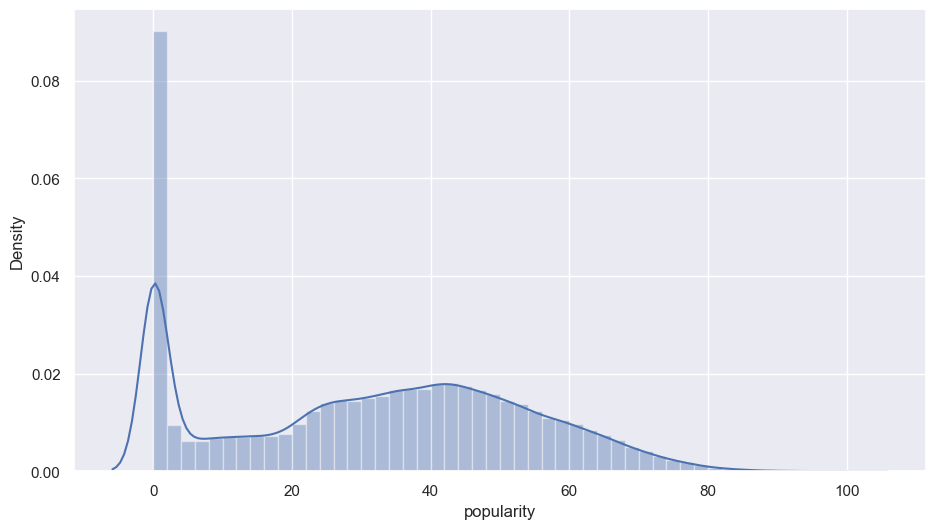

In [155]:
sns.distplot(spotify_data['popularity'])

### Music Over Time

In [156]:
def get_decade(year):
    
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    
    return decade

spotify_data['decade'] = spotify_data['year'].apply(get_decade)

<Axes: xlabel='count', ylabel='decade'>

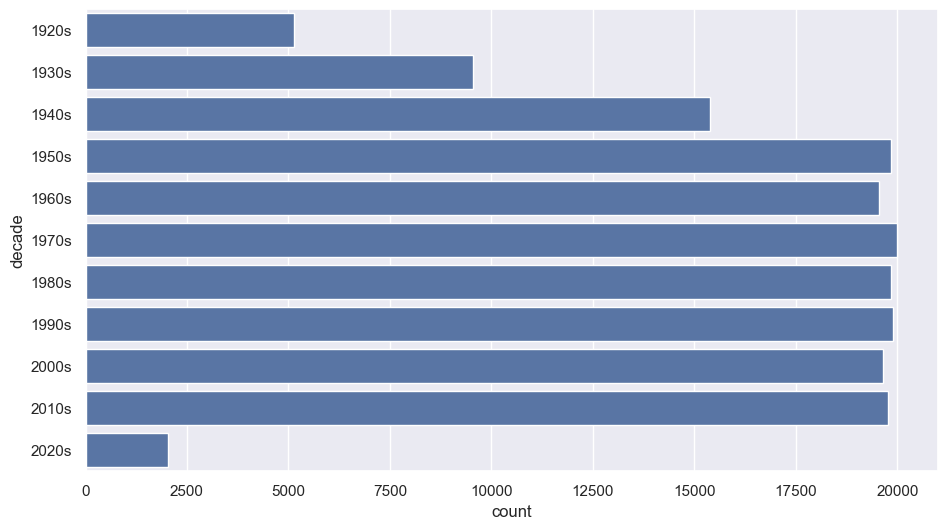

In [157]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(spotify_data['decade'])

### Characteristics of Different Genres

In [158]:
top10_genres = genre_data.nlargest(10, 'popularity')

## Clustering Genres

In [159]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])

X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [160]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.009s...
[t-SNE] Computed neighbors for 2973 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] Computed conditional probabilities in 0.051s
[t-SNE] Iteration 50: error = 78.8346786, gradient norm = 0.0263564 (50 iterations in 0.461s)
[t-SNE] Iteration 100: error = 76.2439728, gradient norm = 0.0015455 (50 iterations in 0.318s)
[t-SNE] Iteration 150: error = 76.1402435, gradient norm = 0.0004763 (50 iterations in 0.304s)
[t-SNE] Iteration 200: error = 76.1150970, gradient norm = 0.0001650 (50 iterations in 0.294s)
[t-SNE] Iteration 250: error = 76.1060486, gradient norm = 0.0000869 (50 iterations in 0.293s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106049
[t-SNE] Iteration 300: erro

## Clustering Songs

In [161]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2))], verbose=True)
X = spotify_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 1580744.6586990138.
Iteration 1, inertia 1199246.0367500726.
Iteration 2, inertia 1134983.8217028175.
Iteration 3, inertia 1107167.8473192113.
Iteration 4, inertia 1097121.192429915.
Iteration 5, inertia 1091411.8451552014.
Iteration 6, inertia 1087417.8029622582.
Iteration 7, inertia 1084314.2863847073.
Iteration 8, inertia 1081511.8235640202.
Iteration 9, inertia 1078402.3122691344.
Iteration 10, inertia 1075644.3822644292.
Iteration 11, inertia 1073873.174896792.
Iteration 12, inertia 1072534.450624209.
Iteration 13, inertia 1071517.3393193455.
Iteration 14, inertia 1070753.2277305166.
Iteration 15, inertia 1070179.9753988306.
Iteration 16, inertia 1069752.6515509672.
Iteration 17, inertia 1069415.8947736828.
Iteration 18, inertia 1069126.1907045124.


c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 19, inertia 1068873.9996144262.
Iteration 20, inertia 1068631.755585429.
Iteration 21, inertia 1068386.9548867596.
Iteration 22, inertia 1068132.422147541.
Iteration 23, inertia 1067888.7889615798.
Iteration 24, inertia 1067677.5518134055.
Iteration 25, inertia 1067469.7575169103.
Iteration 26, inertia 1067293.9417796293.
Iteration 27, inertia 1067150.3683492723.
Iteration 28, inertia 1067033.4726940147.
Iteration 29, inertia 1066943.6783704944.
Iteration 30, inertia 1066866.8397660244.
Iteration 31, inertia 1066799.1595469986.
Iteration 32, inertia 1066737.5089416252.
Iteration 33, inertia 1066684.0396022745.
Iteration 34, inertia 1066639.9360831664.
Iteration 35, inertia 1066603.2328284155.
Iteration 36, inertia 1066574.1166442528.
Iteration 37, inertia 1066545.784557464.
Iteration 38, inertia 1066521.1308037846.
Iteration 39, inertia 1066502.5357811574.
Iteration 40, inertia 1066485.8304157478.
Iteration 41, inertia 1066471.5682091643.
Iteration 42, inertia 1066458.1668487

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=20, verbose=2))],
         verbose=True)

In [162]:
song_cluster_labels = song_cluster_pipeline.predict(X)

In [163]:
spotify_data['cluster_label'] = song_cluster_labels

In [164]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_data['name']
projection['cluster'] = spotify_data['cluster_label']

## Building a Content-Based Recommender System

In [165]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):

    song_data = spotify_data[(spotify_data['name'] == song['name']) 
                            & (spotify_data['year'] == song['year'])].iloc[0]
    return song_data

        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict
        

def recommend_songs( song_list, spotify_data, n_songs=10):
    
    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)
    
    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [166]:
recommend_songs([{'name': "Tyler Herro", 'year': 2020}], spotify_data)


c:\Users\reube\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'name': 'Secrets', 'year': 2020, 'artists': 'Regard, RAYE'},
 {'name': 'Stupid Again', 'year': 2020, 'artists': 'Tory Lanez'},
 {'name': '20 Min', 'year': 2017, 'artists': 'Lil Uzi Vert'},
 {'name': 'How I Move (feat. Lil Baby)',
  'year': 2019,
  'artists': 'Flipp Dinero, Lil Baby'},
 {'name': 'hot girl bummer', 'year': 2020, 'artists': 'blackbear'},
 {'name': 'How I Move (feat. Lil Baby)',
  'year': 2019,
  'artists': 'Flipp Dinero, Lil Baby'},
 {'name': 'Me Vs Me', 'year': 2020, 'artists': 'Moneybagg Yo'},
 {'name': 'Formation', 'year': 2016, 'artists': 'Beyoncé'},
 {'name': 'Treasure', 'year': 2012, 'artists': 'Bruno Mars'}]